# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Total Number if Cities is {len(cities)}")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import json

print("Beginning Data Retrieval")
print("--"*30)

cw = []

for index in range(len(cities)):

    print(f"Processing Record {index} | {cities[index]}")


Beginning Data Retrieval
------------------------------------------------------------
Processing Record 0 | goldap
Processing Record 1 | severo-kurilsk
Processing Record 2 | sangar
Processing Record 3 | lasa
Processing Record 4 | new norfolk
Processing Record 5 | ferrandina
Processing Record 6 | lavrentiya
Processing Record 7 | sainte-maxime
Processing Record 8 | rikitea
Processing Record 9 | qaanaaq
Processing Record 10 | kiruna
Processing Record 11 | bethel
Processing Record 12 | thompson
Processing Record 13 | carnarvon
Processing Record 14 | kodiak
Processing Record 15 | ubinskoye
Processing Record 16 | kaitangata
Processing Record 17 | kahului
Processing Record 18 | mataura
Processing Record 19 | nizhneyansk
Processing Record 20 | thabazimbi
Processing Record 21 | brahmapuri
Processing Record 22 | east london
Processing Record 23 | tuktoyaktuk
Processing Record 24 | cape town
Processing Record 25 | kijang
Processing Record 26 | lagoa
Processing Record 27 | atuona
Processing Record

In [4]:
print(json.dumps(cw, indent=4, sort_keys=2))

[]


In [5]:
CW=pd.DataFrame({"City": cities})
# CW['City'] = ""
CW['Cloudiness'] = ""
CW['Country'] = ""
CW['Date'] = ""
CW['Humidity'] = ""
CW['Lat'] = ""
CW['Lng'] = ""
CW['Max Temp'] = ""
CW['Wind Speed'] = ""
CW.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,goldap,,,,,,,,
1,severo-kurilsk,,,,,,,,
2,sangar,,,,,,,,
3,lasa,,,,,,,,
4,new norfolk,,,,,,,,


In [6]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?q=albany&units=imperial&appid={weather_api_key}"
print(query_url)
response = requests.get(query_url).json()
print(json.dumps(response, indent=4))
response["name"]

http://api.openweathermap.org/data/2.5/weather?q=albany&units=imperial&appid=befa291f2b63ca9080438274306d9a16
{
    "coord": {
        "lon": -73.97,
        "lat": 42.6
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 55.8,
        "feels_like": 49.37,
        "temp_min": 52,
        "temp_max": 62.6,
        "pressure": 1016,
        "humidity": 45
    },
    "visibility": 16093,
    "wind": {
        "speed": 5.82,
        "deg": 160
    },
    "clouds": {
        "all": 90
    },
    "dt": 1589517635,
    "sys": {
        "type": 1,
        "id": 3273,
        "country": "US",
        "sunrise": 1589535201,
        "sunset": 1589587879
    },
    "timezone": -14400,
    "id": 5106841,
    "name": "Albany",
    "cod": 200
}


'Albany'

In [7]:
for index, row in CW.iterrows():
    city = row['City']
    
    print(f"Retrieving Results for Index {index}:")
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}"
    print(query_url)
    response = requests.get(query_url).json()
#     CW.append(response.json())
    
    try:
        
        CW.loc[index, 'City'] = response['name']
        CW.loc[index, 'Cloudiness'] = response['clouds']['all']
        CW.loc[index, 'Country'] = response['sys']['country']
        CW.loc[index, 'Date'] = response['dt']
        CW.loc[index, 'Humidity'] = response['main']['humidity']
        CW.loc[index, 'Lat'] = response['coord']['lat']
        CW.loc[index, 'Lng'] = response['coord']['lon']
        CW.loc[index, 'Max Temp'] = response['main']['temp_max']
        CW.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")


Retrieving Results for Index 0:
http://api.openweathermap.org/data/2.5/weather?q=goldap&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 1:
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 2:
http://api.openweathermap.org/data/2.5/weather?q=sangar&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 3:
http://api.openweathermap.org/data/2.5/weather?q=lasa&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 4:
http://api.openweathermap.org/data/2.5/weather?q=new norfolk&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 5:
http://api.openweathermap.org/data/2.5/weather?q=ferrandina&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 6:
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya&units=imperial&appid=befa291f2b63ca908043

Retrieving Results for Index 56:
http://api.openweathermap.org/data/2.5/weather?q=punta arenas&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 57:
http://api.openweathermap.org/data/2.5/weather?q=masalli&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 58:
http://api.openweathermap.org/data/2.5/weather?q=vardo&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 59:
http://api.openweathermap.org/data/2.5/weather?q=bolungarvik&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Missing field/result... skipping.
Retrieving Results for Index 60:
http://api.openweathermap.org/data/2.5/weather?q=deh rawud&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Missing field/result... skipping.
Retrieving Results for Index 61:
http://api.openweathermap.org/data/2.5/weather?q=upernavik&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 62:
http://api.openweatherma

Retrieving Results for Index 110:
http://api.openweathermap.org/data/2.5/weather?q=solano&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 111:
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 112:
http://api.openweathermap.org/data/2.5/weather?q=alice springs&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 113:
http://api.openweathermap.org/data/2.5/weather?q=vostok&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 114:
http://api.openweathermap.org/data/2.5/weather?q=aykhal&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 115:
http://api.openweathermap.org/data/2.5/weather?q=hilo&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 116:
http://api.openweathermap.org/data/2.5/weather?q=horta&units=imperial&appid=befa291f2b63ca

Retrieving Results for Index 166:
http://api.openweathermap.org/data/2.5/weather?q=constitucion&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 167:
http://api.openweathermap.org/data/2.5/weather?q=georgetown&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 168:
http://api.openweathermap.org/data/2.5/weather?q=bhakkar&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 169:
http://api.openweathermap.org/data/2.5/weather?q=jiddah&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Missing field/result... skipping.
Retrieving Results for Index 170:
http://api.openweathermap.org/data/2.5/weather?q=saint-pierre&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 171:
http://api.openweathermap.org/data/2.5/weather?q=college&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 172:
http://api.openweathermap.org/data/2.5/weather?q=n

Missing field/result... skipping.
Retrieving Results for Index 221:
http://api.openweathermap.org/data/2.5/weather?q=christchurch&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 222:
http://api.openweathermap.org/data/2.5/weather?q=krasnoselkup&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 223:
http://api.openweathermap.org/data/2.5/weather?q=pakxan&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 224:
http://api.openweathermap.org/data/2.5/weather?q=westport&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 225:
http://api.openweathermap.org/data/2.5/weather?q=portland&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 226:
http://api.openweathermap.org/data/2.5/weather?q=half moon bay&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 227:
http://api.openweathermap.org/data/2.5/weathe

Retrieving Results for Index 277:
http://api.openweathermap.org/data/2.5/weather?q=bengkulu&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 278:
http://api.openweathermap.org/data/2.5/weather?q=louisbourg&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Missing field/result... skipping.
Retrieving Results for Index 279:
http://api.openweathermap.org/data/2.5/weather?q=puerto escondido&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 280:
http://api.openweathermap.org/data/2.5/weather?q=saint george&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 281:
http://api.openweathermap.org/data/2.5/weather?q=hearst&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 282:
http://api.openweathermap.org/data/2.5/weather?q=sur&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 283:
http://api.openweathermap.org/data/2.5/weather?q=

Retrieving Results for Index 334:
http://api.openweathermap.org/data/2.5/weather?q=dyatkovo&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 335:
http://api.openweathermap.org/data/2.5/weather?q=maragogi&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 336:
http://api.openweathermap.org/data/2.5/weather?q=pokrovskoye&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 337:
http://api.openweathermap.org/data/2.5/weather?q=san isidro&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 338:
http://api.openweathermap.org/data/2.5/weather?q=eydhafushi&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 339:
http://api.openweathermap.org/data/2.5/weather?q=halalo&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Missing field/result... skipping.
Retrieving Results for Index 340:
http://api.openweathermap.org/data/2.5/weather?q=co

Retrieving Results for Index 390:
http://api.openweathermap.org/data/2.5/weather?q=kidal&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 391:
http://api.openweathermap.org/data/2.5/weather?q=inta&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 392:
http://api.openweathermap.org/data/2.5/weather?q=sorong&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 393:
http://api.openweathermap.org/data/2.5/weather?q=tuatapere&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 394:
http://api.openweathermap.org/data/2.5/weather?q=fruitville&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 395:
http://api.openweathermap.org/data/2.5/weather?q=barcelona&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 396:
http://api.openweathermap.org/data/2.5/weather?q=bathsheba&units=imperial&appid=befa291f2b63ca9

Retrieving Results for Index 446:
http://api.openweathermap.org/data/2.5/weather?q=mehran&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 447:
http://api.openweathermap.org/data/2.5/weather?q=itaituba&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 448:
http://api.openweathermap.org/data/2.5/weather?q=hambantota&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 449:
http://api.openweathermap.org/data/2.5/weather?q=ponta delgada&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 450:
http://api.openweathermap.org/data/2.5/weather?q=los llanos de aridane&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 451:
http://api.openweathermap.org/data/2.5/weather?q=jumla&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 452:
http://api.openweathermap.org/data/2.5/weather?q=kysyl-syr&units=imperial&a

Retrieving Results for Index 502:
http://api.openweathermap.org/data/2.5/weather?q=sucua&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 503:
http://api.openweathermap.org/data/2.5/weather?q=platteville&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 504:
http://api.openweathermap.org/data/2.5/weather?q=ndele&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 505:
http://api.openweathermap.org/data/2.5/weather?q=san ramon&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 506:
http://api.openweathermap.org/data/2.5/weather?q=rabo de peixe&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 507:
http://api.openweathermap.org/data/2.5/weather?q=awjilah&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 508:
http://api.openweathermap.org/data/2.5/weather?q=rocha&units=imperial&appid=befa291f2b63

Retrieving Results for Index 557:
http://api.openweathermap.org/data/2.5/weather?q=vyartsilya&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 558:
http://api.openweathermap.org/data/2.5/weather?q=ugoofaaru&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 559:
http://api.openweathermap.org/data/2.5/weather?q=bloemfontein&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 560:
http://api.openweathermap.org/data/2.5/weather?q=panan&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 561:
http://api.openweathermap.org/data/2.5/weather?q=araripe&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 562:
http://api.openweathermap.org/data/2.5/weather?q=provideniya&units=imperial&appid=befa291f2b63ca9080438274306d9a16
Retrieving Results for Index 563:
http://api.openweathermap.org/data/2.5/weather?q=taft&units=imperial&appid=befa291f2

In [8]:
CW

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gołdap,0,PL,1589517722,74,54.31,22.3,39.18,9.44
1,Severo-Kuril'sk,12,RU,1589517722,82,50.68,156.12,38.93,10.16
2,Sangar,97,RU,1589517722,54,63.92,127.47,53.24,14.83
3,Laas,75,IT,1589517722,93,46.62,10.7,51.01,4.7
4,New Norfolk,57,AU,1589517487,79,-42.78,147.06,62.01,5.01
...,...,...,...,...,...,...,...,...,...
598,Lubango,2,AO,1589517889,55,-14.92,13.49,58.12,3.06
599,Riviere-au-Renard,5,CA,1589517889,69,49,-64.4,35.6,4.7
600,sentyabrskiy,,,,,,,,
601,Yatou,100,CN,1589517890,87,37.15,122.38,60.87,4.85


In [9]:
CW['Country'].replace('',np.nan, inplace=True)
CW=CW.dropna()
CW

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gołdap,0,PL,1589517722,74,54.31,22.3,39.18,9.44
1,Severo-Kuril'sk,12,RU,1589517722,82,50.68,156.12,38.93,10.16
2,Sangar,97,RU,1589517722,54,63.92,127.47,53.24,14.83
3,Laas,75,IT,1589517722,93,46.62,10.7,51.01,4.7
4,New Norfolk,57,AU,1589517487,79,-42.78,147.06,62.01,5.01
...,...,...,...,...,...,...,...,...,...
597,Elko,81,US,1589517889,47,41,-115.5,48.99,5.01
598,Lubango,2,AO,1589517889,55,-14.92,13.49,58.12,3.06
599,Riviere-au-Renard,5,CA,1589517889,69,49,-64.4,35.6,4.7
601,Yatou,100,CN,1589517890,87,37.15,122.38,60.87,4.85


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
x = pd.DataFrame(CW)
CW.to_csv('CW_df.csv')
x.to_csv('cw_df.csv')

In [11]:
x

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gołdap,0,PL,1589517722,74,54.31,22.3,39.18,9.44
1,Severo-Kuril'sk,12,RU,1589517722,82,50.68,156.12,38.93,10.16
2,Sangar,97,RU,1589517722,54,63.92,127.47,53.24,14.83
3,Laas,75,IT,1589517722,93,46.62,10.7,51.01,4.7
4,New Norfolk,57,AU,1589517487,79,-42.78,147.06,62.01,5.01
...,...,...,...,...,...,...,...,...,...
597,Elko,81,US,1589517889,47,41,-115.5,48.99,5.01
598,Lubango,2,AO,1589517889,55,-14.92,13.49,58.12,3.06
599,Riviere-au-Renard,5,CA,1589517889,69,49,-64.4,35.6,4.7
601,Yatou,100,CN,1589517890,87,37.15,122.38,60.87,4.85


In [12]:
print("city-------")
print(CW['City'].count())
print("cloudiness-")
print(CW['Cloudiness'].count())
print('Country----')
print(CW['Country'].count())
print('Date-------')
print(CW['Date'].count())
print('Humidity---')
print(CW['Humidity'].count())
print('Lat--------')
print(CW['Lat'].count())
print('Lng--------')
print(CW['Lng'].count())
print('Max Temp---')
print(CW['Max Temp'].count())
print('Wind Speed-')
print(CW['Wind Speed'].count())

city-------
550
cloudiness-
550
Country----
550
Date-------
550
Humidity---
550
Lat--------
550
Lng--------
550
Max Temp---
550
Wind Speed-
550


In [13]:
len(CW)

550

In [14]:

# wtf = CW.loc(CW['Lat']>=90)
type(CW['Lat'])

pandas.core.series.Series

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [15]:
print(CW['Max Temp'])

0      39.18
1      38.93
2      53.24
3      51.01
4      62.01
       ...  
597    48.99
598    58.12
599     35.6
601    60.87
602     75.2
Name: Max Temp, Length: 550, dtype: object


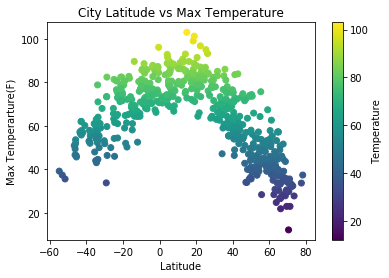

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(CW['Lat'], CW['Max Temp'],
            c=CW['Max Temp'])
clb = plt.colorbar()
clb.set_label("Temperature")

plt.title("City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperarture(F)')
plt.show()
plt.savefig('Lat_MaxTemp.png')

#### Latitude vs. Humidity Plot

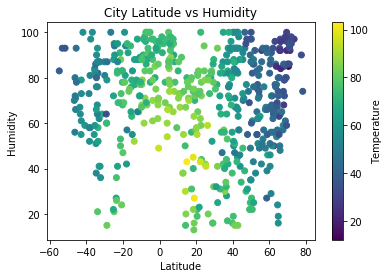

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(CW['Lat'], CW['Humidity'],
  c=CW['Max Temp'])
clb = plt.colorbar()
clb.set_label("Temperature")

            
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig('Humidity.png')

#### Latitude vs. Cloudiness Plot

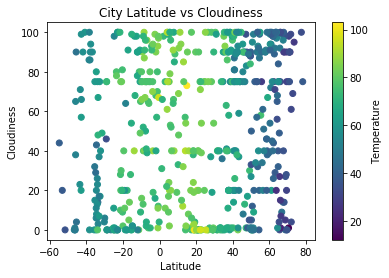

<Figure size 432x288 with 0 Axes>

In [18]:
plt.scatter(CW['Lat'], CW['Cloudiness'],
c=CW['Max Temp'])
clb = plt.colorbar()
clb.set_label("Temperature")

plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig('Cloudiness.png')

#### Latitude vs. Wind Speed Plot

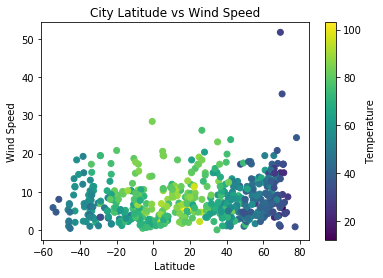

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(CW['Lat'], CW['Wind Speed'],
            
c=CW['Max Temp'])
clb = plt.colorbar()
clb.set_label("Temperature")
            
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig('WindSpeed.png')

## Linear Regression

In [20]:
# Create Northern and Southern Hemisphere DataFrames
CW_north = CW.loc[(CW['Lat']>=0)] 
CW_south = CW.loc[(CW['Lat']<0)] 

# CW_north.sort_values(by=['City'])
# CW_south.sort_values(by=['City'])

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots
import seaborn as sn

(slope, intercept, rvalue, pvalue, stderr) = linregress(CW['Lat'],CW['Max Temp'])
regress_values = CW['Lat'] * slope + intercept


AttributeError: 'float' object has no attribute 'shape'

####  Northern Hemiasphere - Max Temp vs. Latitude Linear Regression

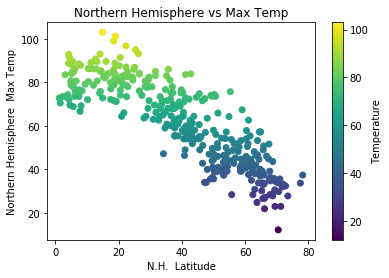

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(CW_north['Lat'], CW_north['Max Temp'],

c=CW_north['Max Temp'])
clb = plt.colorbar()
clb.set_label("Temperature")

plt.title("Northern Hemisphere vs Max Temp")
plt.xlabel('N.H.  Latitude')
plt.ylabel('Northern Hemisphere  Max Temp')
plt.show()
plt.savefig('NH_MaxTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

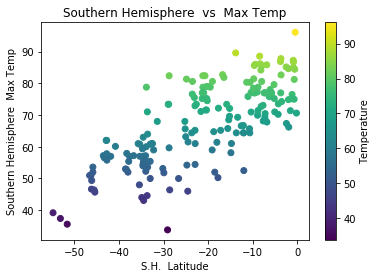

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(CW_south['Lat'], CW_south['Max Temp'],
            
c=CW_south['Max Temp'])
clb = plt.colorbar()
clb.set_label('Temperature')

plt.title("Southern Hemisphere  vs  Max Temp")
plt.xlabel('S.H.  Latitude')
plt.ylabel('Southern Hemisphere  Max Temp')
plt.show()
plt.savefig('SH_MaxTemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

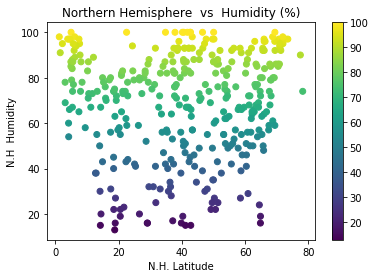

<Figure size 432x288 with 0 Axes>

In [24]:
plt.scatter(CW_north['Lat'], CW_north['Humidity'],

c=CW_north['Humidity'])
clb = plt.colorbar()
# clb.set_label('Humidity (%)')

plt.title("Northern Hemisphere  vs  Humidity (%)")
plt.xlabel('N.H. Latitude')
plt.ylabel('N.H  Humidity')
plt.show()
plt.savefig('NH_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

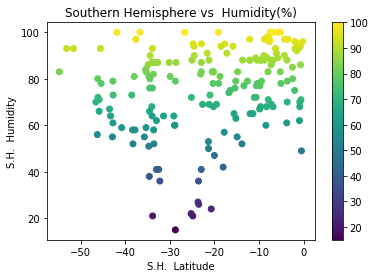

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(CW_south['Lat'], CW_south['Humidity'],
            
c=CW_south['Humidity'])
clb = plt.colorbar()
# clb.set_label('S.H. Humidity (%)')

plt.title("Southern Hemisphere vs  Humidity(%)")
plt.xlabel('S.H.  Latitude')
plt.ylabel('S.H.  Humidity')
plt.show()
plt.savefig('SH_Humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

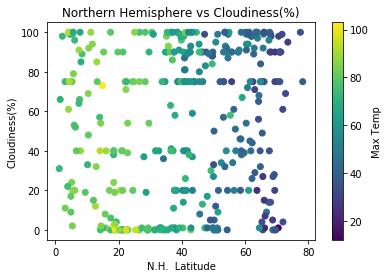

In [26]:
plt.scatter(CW_north['Lat'], CW_north['Cloudiness'],

c=CW_north['Max Temp'])
clb = plt.colorbar()
clb.set_label("Max Temp"
           )

plt.title("Northern Hemisphere vs Cloudiness(%)")
plt.xlabel('N.H.  Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

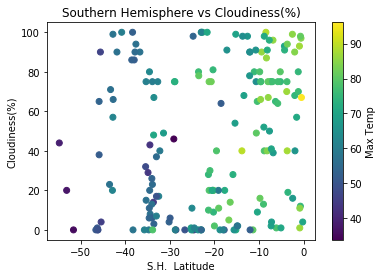

In [27]:
plt.scatter(CW_south['Lat'], CW_south['Cloudiness'],
            
c=CW_south['Max Temp'])
clb = plt.colorbar()
clb.set_label("Max Temp"
             )

plt.title("Southern Hemisphere vs Cloudiness(%)")
plt.xlabel('S.H.  Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

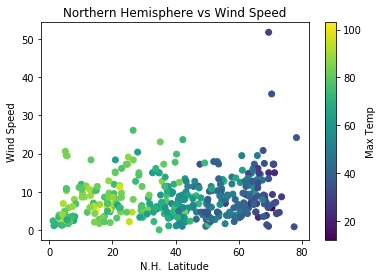

In [28]:
plt.scatter(CW_north['Lat'], CW_north['Wind Speed'],

c=CW_north['Max Temp'])
clb = plt.colorbar()
clb.set_label("Max Temp"
             )

plt.title("Northern Hemisphere vs Wind Speed")
plt.xlabel('N.H.  Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

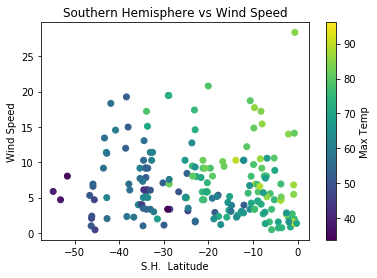

In [29]:
plt.scatter(CW_south['Lat'], CW_south['Wind Speed'],
            
c=CW_south['Max Temp'])
clb = plt.colorbar()
clb.set_label("Max Temp"
             )

plt.title("Southern Hemisphere vs Wind Speed")
plt.xlabel('S.H.  Latitude')
plt.ylabel('Wind Speed')

plt.show()

World City Tempurature


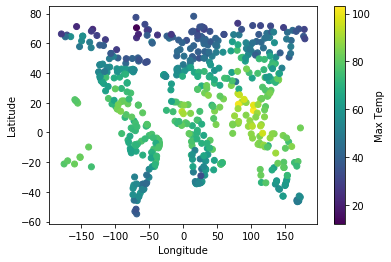

<Figure size 432x288 with 0 Axes>

In [30]:
print('World City Tempurature')

plt.scatter(CW['Lng']
            ,CW['Lat']
            ,c=CW['Max Temp'])

clb = plt.colorbar()
plt.ylabel("Latitude")
plt.xlabel("Longitude")
clb.set_label("Max Temp")
plt.show()
plt.savefig('World_Max_Temp_Map.png')

In [205]:
import numpy as np
import scipy.stats as st
import seaborn as sns


In [340]:
CW['Cloudiness'] = CW['Cloudiness'].astype(str).astype(float)
CW['Humidity'] = CW['Humidity'].astype(str).astype(float)
CW['Lat'] = CW['Lat'].astype(str).astype(float)
CW['Lng'] = CW['Lng'].astype(str).astype(float)
CW['Max Temp'] = CW['Max Temp'].astype(str).astype(float)
CW['Wind Speed'] = CW['Wind Speed'].astype(str).astype(float)

C:\Users\Jordo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jordo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jordo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

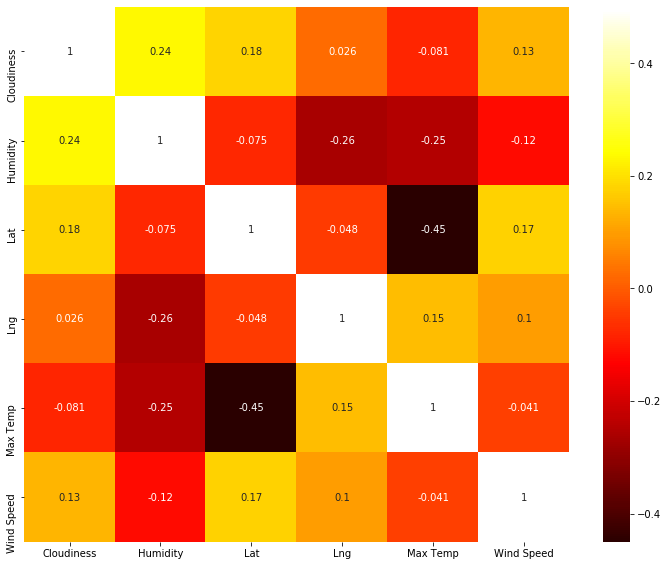

<Figure size 432x288 with 0 Axes>

In [342]:
Allweather = pd.DataFrame(CW, columns=[
'Cloudiness',
'Humidity',
'Lat',
'Lng',
'Max Temp',
'Wind Speed',
    ])
corrMatrix = Allweather.corr(method='pearson')
plt.figure(figsize=(10,8))
# sns.heatmap(corrMatrix, cmap='cool',center=-.06, vmax=1, vmin=-.555, annot=True)
sns.heatmap(corrMatrix, cmap='hot',center=-.0, vmax=.5, vmin=-.45, annot=True)
# sns.heatmap(subjective_corr, cmap='hot',center=-.1, vmax=.6, vmin=-.8, annot=True, mask = mask)


fig_name = "City Weather Corr Matrix"
plt.tight_layout()


plt.show()
plt.savefig("compare.png")

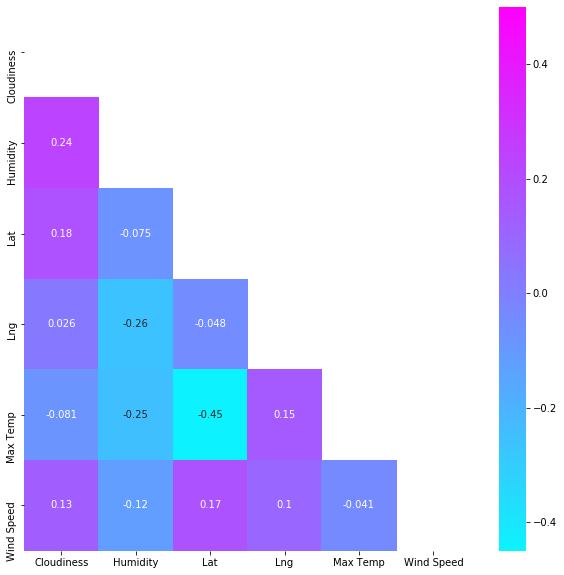

In [339]:
mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
# sns.heatmap(corrMatrix, cmap='cool',center=.0, vmax=.15, vmin=-.14, annot=True, mask = mask)
sns.heatmap(corrMatrix, cmap='cool',center=.00, vmax=.5, vmin=-.45, annot=True, mask = mask)
plt.show()
# plt.savefig("compare_masked.png")